In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Import library**

Import some libraries to support the model running

In [ ]:
import os
import shutil
import splitfolders
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from google.colab import files

tf.random.set_seed(2022)

# **Preparation dataset**

Split the data with ratio 0.75 and 0.25 which in turn each contain train and test subdirectories in output directory. [Data](https://drive.google.com/drive/folders/190Y9mArqruqMurgsd8XIiOgioHSP68Kl?usp=sharing) source from [Kaggle](https://www.kaggle.com/datasets/gutierrezsoares/rice-leafs-500px).

In [ ]:
os.mkdir("./Data Padi/")
splitfolders.ratio("/content/drive/MyDrive/Data Padi Fix", output="./Data Padi", seed=2022, ratio=(.75, .25), group_prefix=None)

Copying files: 900 files [00:20, 43.12 files/s] 


Sample Bercak Coklat image:


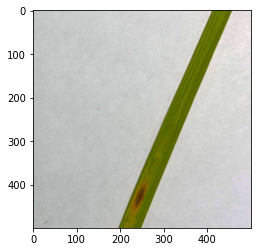

Sample Busuk Leher image:


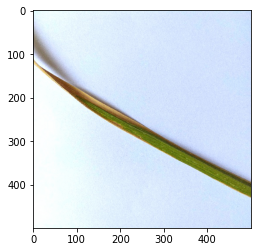

Sample Hawar Daun image:


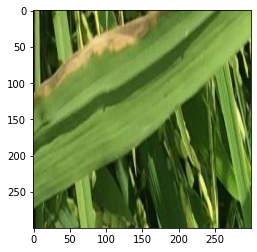

In [ ]:
bercakCoklat_dir = "./Data Padi/train/Bercak Coklat"
busukLeher_dir = "./Data Padi/train/Busuk Leher"
hawardaun_dir = "./Data Padi/train/Hawar Daun" 

print("Sample Bercak Coklat image:")
plt.imshow(load_img(f"{os.path.join(bercakCoklat_dir, os.listdir(bercakCoklat_dir)[0])}"))
plt.show()

print("Sample Busuk Leher image:")
plt.imshow(load_img(f"{os.path.join(busukLeher_dir, os.listdir(busukLeher_dir)[0])}"))
plt.show()

print("Sample Hawar Daun image:")
plt.imshow(load_img(f"{os.path.join(hawardaun_dir, os.listdir(hawardaun_dir)[0])}"))
plt.show()

Use ImageDataGenerator class to prepare train and validation dataset that contains three classes "Bercak Coklat", "Busuk Leher" and "Hawar Daun"

In [ ]:
def image_generator():
    train_datagen = ImageDataGenerator(rescale=1/255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(directory="./Data Padi/train",
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode="categorical")

    validation_datagen = ImageDataGenerator(rescale=1/255)

    validation_generator = validation_datagen.flow_from_directory(directory="./Data Padi/val",
                                                                  target_size=(150, 150),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

    return train_generator, validation_generator
  
train_generator, validation_generator = image_generator()


Found 673 images belonging to 3 classes.
Found 222 images belonging to 3 classes.


# **Modeling**

Preparing the input to the model and fetch the pretrained weights of the `InceptionV3` model and remove the fully connected layer at the end. Then, add dense layers to the model. These will be the layers that you will train and is tasked with recognizing three classes, such as Bercak coklat, Busuk Leher and Hawar Daun

In [ ]:
pretrained_model3 = tf.keras.applications.InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Flatten()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.1)(x3)
outputs3 = tf.keras.layers.Dense(3, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)


optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# **Training model**

We will train for 80 epochs and evaludate the results afterwards.

In [ ]:
datasource_path = "/content/drive/MyDrive/Model/checkpoint"
os.mkdir(datasource_path)
checkpoint = ModelCheckpoint(datasource_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
callbacks_list = [checkpoint]
start_time = time.time()
his=model.fit(train_generator,validation_data=validation_generator,epochs=80, callbacks=[callbacks_list])
detik = (time.time() - start_time)
menit = detik//60
detik = detik - (menit*60)
print("waktu latih: {:.0f}:{:.0f}".format(menit,detik))

Epoch 1/80
22/22 [==============================] - ETA: 0s - loss: 1.2692 - accuracy: 0.5156
Epoch 1: val_accuracy improved from -inf to 0.32883, saving model to ./checkpoint
INFO:tensorflow:Assets written to: ./checkpoint/assets
22/22 [==============================] - 66s 2s/step - loss: 1.2692 - accuracy: 0.5156 - val_loss: 1.1108 - val_accuracy: 0.3288
Epoch 2/80
22/22 [==============================] - ETA: 0s - loss: 1.0623 - accuracy: 0.5869
Epoch 2: val_accuracy did not improve from 0.32883
22/22 [==============================] - 10s 447ms/step - loss: 1.0623 - accuracy: 0.5869 - val_loss: 1.1303 - val_accuracy: 0.3288
Epoch 3/80
22/22 [==============================] - ETA: 0s - loss: 0.8992 - accuracy: 0.6553
Epoch 3: val_accuracy did not improve from 0.32883
22/22 [==============================] - 10s 451ms/step - loss: 0.8992 - accuracy: 0.6553 - val_loss: 1.1072 - val_accuracy: 0.3288
Epoch 4/80
22/22 [==============================] - ETA: 0s - loss: 0.7935 - accuracy:

# **Plot accuracy and loss**

Here, we are going to evaluate the results with plot the accuracy, validation accuray, loss and validation loss results of model training before

Text(0.5, 1.0, 'Training and validation loss')

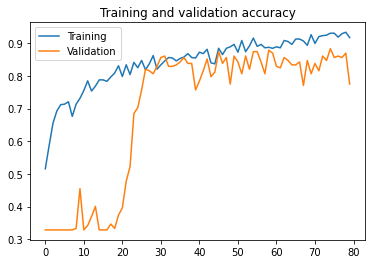

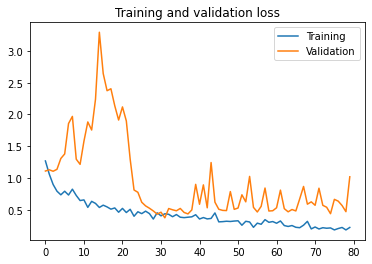

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = his.history[     'accuracy' ]
val_acc  = his.history[ 'val_accuracy' ]
loss     = his.history[    'loss' ]
val_loss = his.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# **Load best model weight**

In [ ]:

model.load_weights('/content/drive/MyDrive/Model/checkpoint')

# **Evaluate model accuracy (Accuracy up to 90.99%)**

In [ ]:
model.evaluate(validation_generator)

7/7 [==============================] - 16s 359ms/step - loss: 0.3676 - accuracy: 0.9099


[0.3676166832447052, 0.9099099040031433]

From the above output, we can see that model accuracy up to 90.99%

# **Test prediction model**

Now take a look at actually running a prediction using the model. This code will allow us to choose 1 or more files from our file system, upload them, and run them through the model, giving an indication of whether the object is a "Bercak Coklat" or "Busuk Leher" or "Hawar Daun"


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x /= 255.0
  prob = model.predict(x)
  classes = np.argmax(prob)

  if classes == 0:
    print("Bercak Coklat")
  elif classes == 1:
    print("Busuk Leher")
  else:
    print("Hawar Daun")

# **Save model**

Convert model to .h5 format in order to deploying model.

In [ ]:
saved_model_path = "/content/drive/MyDrive/Model/rice_clf_9099.h5"

model.save(saved_model_path)

In the end, we will save the trained model to [the drive](https://drive.google.com/drive/folders/1NpAdyMmTS3W-XOsjFMdIoYQwPm1z11uW?usp=sharing). The model will be deployed to the cloud. 